# Gamma Tuning

In [59]:
class make_model():
    def __init__(self , name , clf , gamma ,x ,y):
        self.name = name 
        self.clf = clf 
        self.gamma = gamma 
        self.x = x 
        self.y = y 
        
    def validate(self , fname= '' , k=10 , normalize_prob=0 , score_average = 'macro'):
        from utilities import simple_cv
        #self.weight = self.calc_weight(self.gamma ,self.y)
        res = simple_cv(self.x,self.y , model=self.clf , k=k , normalize_prob=normalize_prob , score_average = score_average)
        res['gamma'] = self.gamma 
        #res['class_weight'] = calc_weight(slef)
        print(res['class_scores'].to_markdown())
        self.result = res
        if(fname):
            import joblib
            joblib.dump(res , fname)
        return self
    
    def train(self):
        clf = self.clf
        clf.fit(self.x , self.y)
        return self
    def save(self , fname):
        import joblib
        joblib.dump(self , fname)

In [96]:
import joblib 
gamma_tune_dict = joblib.load('../not_on_git/gamma_tune_dict.pkl')
gamma_tune_dict

{0.08: <__main__.make_model at 0x7fecd8d19e80>,
 0.09: <__main__.make_model at 0x7fecd1ed5240>,
 0.0: <__main__.make_model at 0x7fecd1ed9a58>,
 0.01: <__main__.make_model at 0x7fecd1d03d30>,
 0.02: <__main__.make_model at 0x7fecd1c9a5c0>,
 0.03: <__main__.make_model at 0x7fecd1c2add8>,
 0.04: <__main__.make_model at 0x7fecd1bbf630>,
 0.05: <__main__.make_model at 0x7fecd1acfe48>,
 0.06: <__main__.make_model at 0x7fecd1a6b6a0>,
 0.07: <__main__.make_model at 0x7fecd19fceb8>,
 0.065: <__main__.make_model at 0x7fecd1917710>,
 0.075: <__main__.make_model at 0x7fecd17479e8>,
 0.085: <__main__.make_model at 0x7fecd166e2b0>,
 0.0775: <__main__.make_model at 0x7fecd1676a90>,
 0.0725: <__main__.make_model at 0x7fecd14a6d68>,
 0.1: <__main__.make_model at 0x7fecd143f5f8>,
 0.095: <__main__.make_model at 0x7fecd1351e10>,
 0.0675: <__main__.make_model at 0x7fecd1115160>}

In [107]:

f1 , pres  , recall , mcc = []  , [] , [] , [] 
gamma = []
for el in gamma_tune_dict.keys():
    f1.append(gamma_tune_dict[el].result['f1'])
    pres.append(gamma_tune_dict[el].result['precision'])
    recall.append(gamma_tune_dict[el].result['recall'])
    mcc.append(gamma_tune_dict[el].result['mcc'])
    gamma.append(el)
gamma_score = pd.DataFrame({
    'gamma' : gamma ,
    'MCC' : mcc ,
    'precision' : pres , 
    'recall' : recall , 
    'f1 score' : f1 ,
}).sort_values(by='gamma').reset_index(drop=True)
gamma_score = gamma_score[gamma_score['gamma']<0.098]
gamma_score = gamma_score[gamma_score['gamma']!=0.0675]
gamma_score

gamma       MCC  precision    recall  f1 score
0   0.0000  0.902354   0.825647  0.741914  0.775135
1   0.0100  0.903654   0.815030  0.744892  0.772984
2   0.0200  0.904010   0.814175  0.750969  0.777873
3   0.0300  0.908147   0.827579  0.773332  0.797430
4   0.0400  0.907496   0.807328  0.764431  0.783577
5   0.0500  0.905469   0.806781  0.771818  0.787540
6   0.0600  0.906925   0.812620  0.790910  0.800966
7   0.0650  0.906818   0.806899  0.788814  0.796865
9   0.0700  0.911602   0.813208  0.799014  0.805188
10  0.0725  0.904418   0.796098  0.788023  0.790790
11  0.0750  0.906057   0.800935  0.794440  0.796469
12  0.0775  0.903385   0.801790  0.788546  0.793449
13  0.0800  0.903595   0.795149  0.792761  0.792500
14  0.0850  0.904120   0.797221  0.791712  0.793079
15  0.0900  0.895269   0.783244  0.785888  0.783295
16  0.0950  0.888571   0.774680  0.778999  0.774563

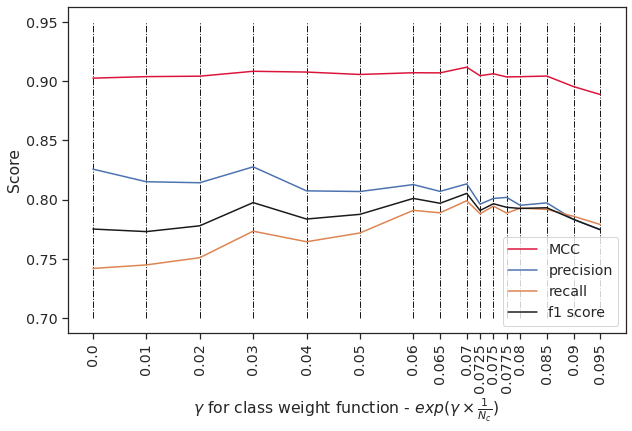

In [121]:
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="ticks")
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,6))

ax.plot(gamma_score['gamma'] , gamma_score['MCC'] , label = 'MCC' , color='crimson')
ax.plot(gamma_score['gamma'] , gamma_score['precision'] , label = 'precision')
ax.plot(gamma_score['gamma'] , gamma_score['recall'] , label = 'recall') 
ax.plot(gamma_score['gamma'] , gamma_score['f1 score'] , label = 'f1 score' , color='k') 
ax.set_xticks(gamma_score['gamma'] , )
ax.set_xticklabels(gamma_score['gamma'], rotation=90)
ax.vlines(gamma_score['gamma'] , ymin = 0.7 , ymax=0.95 , linewidth=1 , color='k' , alpha=1, linestyle='-.')

#ax2 = ax.twinx()
ax.grid(False)
ax.set_xlabel(r'$\gamma$ for class weight function - $exp(\gamma\times\frac{1}{N_c} )$')
ax.set_ylabel('Score')
plt.legend()
plt.savefig('final_plots/gamma_tuning.jpg')
plt.show()

In [122]:
gamma_tune_dict[0.07].result

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2769
 AGN           2416
 YSO           1177
 HMXB           740
 ULX            210
 CV             157
 LMXB           122
 PULSAR         112,
 'balanced_accuracy': 0.7990135039182039,
 'accuracy': 0.9347007659353499,
 'precision': 0.8132076064780758,
 'recall': 0.7990135039182039,
 'f1': 0.805187821761211,
 'mcc': 0.911602433539088,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.974113         0.965646  0.969861
 CV          0.584337         0.617834  0.600619
 HMXB        0.913102         0.922973  0.918011
 LMXB        0.804196         0.942623  0.867925
 PULSAR      0.485149         0.437500  0.460094
 STAR        0.957348         0.964608  0.960964
 ULX         0.715640         0.719048  0.717340
 YSO         0.958225         0.935429  0.946690,
 'res

# Calculate scores

In [1]:
import pandas as pd 
import numpy as np 
from utilities import get_score

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


In [16]:
df = pd.read_csv('temp_res_comp/train_prob/mode_GB.csv' , index_col='name')
#df = pd.read_csv('temp_res_comp/train_prob/mode_RF.csv' , index_col='name')
#df = pd.read_csv('temp_res_comp/train_prob/none_lightGBM.csv' , index_col='name')
df 

true_class pred_class  pred_prob  prob_AGN   prob_CV  \
name                                                                         
2CXO J181044.4-260901         CV     PULSAR   0.494503  0.013341  0.393068   
2CXO J104409.2-595904        YSO        YSO   0.781595  0.007102  0.032291   
2CXO J224731.7+033549        AGN     PULSAR   0.360628  0.261291  0.057642   
2CXO J053536.6-051850       STAR       STAR   0.909449  0.005718  0.039022   
2CXO J201657.8-704703        ULX     PULSAR   0.479177  0.017152  0.394054   
...                          ...        ...        ...       ...       ...   
2CXO J123613.4+275150        AGN        AGN   0.899162  0.899162  0.039616   
2CXO J161436.5-223031     PULSAR     PULSAR   0.458746  0.005546  0.439247   
2CXO J004142.9-091915       STAR       STAR   0.982564  0.005121  0.001937   
2CXO J040148.9-054056        AGN        AGN   0.977999  0.977999  0.004298   
2CXO J145528.6+031300        AGN        AGN   0.956527  0.956527  0.010662   

                       prob_HMXB  prob_LMXB  prob_PULSAR  prob_STAR  prob_ULX  \
name                                                                            
2CXO J181044.4-260901   0.016631   0.007113     0.494503   0.044733  0.011582   
2CXO J104409.2-595904   0.030874   0.011654     0.031463   0.087751  0.017270   
2CXO J224731.7+033549   0.112283   0.009154     0.360628   0.028470  0.101648   
2CXO J053536.6-051850   0.015799   0.010959     0.012286   0.909449  0.004848   
2CXO J201657.8-704703   0.060770   0.014311     0.479177   0.016743  0.011379   
...                          ...        ...          ...        ...       ...   
2CXO J123613.4+275150   0.005901   0.001148     0.001685   0.003309  0.048364   
2CXO J161436.5-223031   0.018749   0.011930     0.458746   0.006238  0.055581   
2CXO J004142.9-091915   0.008805   0.000297     0.000010   0.982564  0.001242   
2CXO J040148.9-054056   0.003097   0.000158     0.000970   0.008383  0.004967   
2CXO J145528.6+031300   0.028022   0.000182     0.000859   0.000358  0.003230   

                       prob_YSO  
name                             
2CXO J181044.4-260901  0.019030  
2CXO J104409.2-595904  0.781595  
2CXO J224731.7+033549  0.068883  
2CXO J053536.6-051850  0.001918  
2CXO J201657.8-704703  0.006413  
...                         ...  
2CXO J123613.4+275150  0.000816  
2CXO J161436.5-223031  0.003963  
2CXO J004142.9-091915  0.000024  
2CXO J040148.9-054056  0.000128  
2CXO J145528.6+031300  0.000159  

[7703 rows x 11 columns]

In [17]:
get_score([df] , sc_average='macro')

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2633
 AGN           2184
 YSO           1182
 HMXB           786
 ULX            338
 CV             239
 PULSAR         196
 LMXB           145,
 'balanced_accuracy': 0.7951883707695815,
 'accuracy': 0.8908217577567181,
 'precision': 0.7099381876425648,
 'recall': 0.7951883707695815,
 'f1': 0.7404955122619998,
 'mcc': 0.8560587678459877,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.892693         0.978938  0.933828
 CV          0.620482         0.430962  0.508642
 HMXB        0.875668         0.833333  0.853977
 LMXB        0.804196         0.793103  0.798611
 PULSAR      0.554455         0.285714  0.377104
 STAR        0.915771         0.970376  0.942283
 ULX         0.758294         0.473373  0.582878
 YSO         0.939948         0.913706  0.926641}

# Feature Feature Correlation

# Missing features

In [123]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [124]:
from utilities import deets 
from choices import param_dict

In [125]:
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc'
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 73
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


In [126]:
x_all = x.copy()
x_all.insert(0 , 'class' , y.to_list())
x_all

class    gal_b2    gal_l2  var_inter_prob_b  \
name                                                                
2CXO J002359.4-720438    CV  2.487849  8.497420          2.632625   
2CXO J174041.4-534004    CV  4.327881  9.393618          9.999996   
2CXO J002409.2-720543    CV  2.488746  8.496825          9.999844   
2CXO J002411.1-720620    CV  2.489281  8.496673          8.302307   
2CXO J002401.4-720441    CV  2.487878  8.497314          5.005657   
...                     ...       ...       ...               ...   
2CXO J003444.5-431554   AGN  0.888957  8.713766               NaN   
2CXO J203606.3+422737   YSO  5.054270  2.262789               NaN   
2CXO J131747.5+411745   AGN  9.176328  2.880393               NaN   
2CXO J023234.3-073105   AGN  1.697797  4.953135               NaN   
2CXO J103357.8+574942   AGN  7.844756  4.207243          2.671740   

                       var_inter_sigma_b  var_intra_prob_b  var_inter_index_b  \
name                                                                            
2CXO J002359.4-720438           0.000904          5.046627               0.00   
2CXO J174041.4-534004           0.017956          1.995495              10.00   
2CXO J002409.2-720543           0.001090          6.298061               7.50   
2CXO J002411.1-720620           0.026969          8.383567               6.25   
2CXO J002401.4-720441           0.000442          7.272317               3.75   
...                                  ...               ...                ...   
2CXO J003444.5-431554                NaN          3.074255                NaN   
2CXO J203606.3+422737                NaN          3.363494                NaN   
2CXO J131747.5+411745                NaN          1.768983                NaN   
2CXO J023234.3-073105                NaN          2.139396                NaN   
2CXO J103357.8+574942           0.000865          6.246234               0.00   

                       kp_intra_prob_b  var_intra_index_b         h-csc  ...  \
name                                                                     ...   
2CXO J002359.4-720438         8.195828                1.0  1.499984e-09  ...   
2CXO J174041.4-534004         8.236122                0.0  1.102579e-07  ...   
2CXO J002409.2-720543         8.909807                1.0  8.495617e-10  ...   
2CXO J002411.1-720620         9.841010                2.0  9.022461e-10  ...   
2CXO J002401.4-720441         9.850364                2.0  1.416053e-09  ...   
...                                ...                ...           ...  ...   
2CXO J003444.5-431554         0.408315                0.0           NaN  ...   
2CXO J203606.3+422737         8.996703                0.0           NaN  ...   
2CXO J131747.5+411745         2.472603                0.0  9.654383e-08  ...   
2CXO J023234.3-073105         6.885965                0.0  3.949075e-07  ...   
2CXO J103357.8+574942         7.331247                1.0           NaN  ...   

                             Rp       B-R       G-J      G-W2      Bp-H  \
name                                                                      
2CXO J002359.4-720438  4.784757  2.894845       NaN       NaN       NaN   
2CXO J174041.4-534004       NaN       NaN       NaN       NaN       NaN   
2CXO J002409.2-720543       NaN       NaN       NaN       NaN       NaN   
2CXO J002411.1-720620       NaN       NaN       NaN       NaN       NaN   
2CXO J002401.4-720441       NaN       NaN       NaN       NaN       NaN   
...                         ...       ...       ...       ...       ...   
2CXO J003444.5-431554       NaN       NaN       NaN       NaN       NaN   
2CXO J203606.3+422737  7.935403  4.953001  7.119828       NaN  6.445148   
2CXO J131747.5+411745  8.002279  2.122574       NaN  5.055027       NaN   
2CXO J023234.3-073105       NaN       NaN       NaN       NaN       NaN   
2CXO J103357.8+574942       NaN       NaN       NaN       NaN       NaN   

                          Bp-W3      Rp-K       J-H  

In [162]:
miss = []
for cl in y.unique():
#    cl = 'AGN'
    temp = x_all[x_all['class']==cl].drop(columns=['class'])
    miss.append((1-temp.isna().sum(axis=0) / len(temp)).to_frame(name=cl))
miss = pd.concat(miss , axis=1)
miss.insert(0 , 'overall' , (1-x.isna().sum(axis=0) / len(x)).to_list())
miss = miss[['overall' , 'AGN' , 'STAR' ,'YSO' , 'CV' , 'HMXB' , 'PULSAR'  , 'LMXB' ,'ULX']]

In [172]:
from choices import param_dict 
param_dict['inter-obs-var'] = ['var_inter_prob_b' , 'var_inter_sigma_b' , 'var_inter_index_b']
param_dict['intra-obs-var'] = ['var_intra_prob_b' , 'kp_intra_prob_b' , 'var_intra_index_b']
comb = ['WISE' , '2MASS' , 'GAIA' , 'SDSS' , 'GALEX' ,'inter-obs-var','intra-obs-var' ]
comb_df = []
for c in comb:
    comb_df.append(miss.loc[param_dict[c]].mean().to_frame(name=c).T)
comb_df = pd.concat(comb_df)
comb_df

overall       AGN      STAR       YSO        CV      HMXB  \
WISE           0.412307  0.768163  0.365591  0.225413  0.030120  0.044452   
2MASS          0.553507  0.263744  0.913262  0.854656  0.158635  0.071301   
GAIA           0.599766  0.605428  0.800358  0.583116  0.367470  0.167112   
SDSS           0.237648  0.705136  0.037419  0.000174  0.062651  0.022193   
GALEX          0.171881  0.492902  0.044624  0.000000  0.048193  0.002674   
inter-obs-var  0.496560  0.317745  0.547312  0.554395  0.481928  0.716578   
intra-obs-var  0.948851  0.986639  0.922222  0.947781  0.795181  0.965241   

                 PULSAR      LMXB       ULX  
WISE           0.049505  0.076923  0.014218  
2MASS          0.089109  0.048951  0.030016  
GAIA           0.287129  0.181818  0.123223  
SDSS           0.000000  0.000000  0.048341  
GALEX          0.019802  0.034965  0.009479  
inter-obs-var  0.495050  0.951049  0.464455  
intra-obs-var  0.950495  0.874126  0.990521

In [173]:
sep_col = ['h-csc' ,'b-csc' , 'm-csc' , 'u-csc' ,'0p3_8_csc' ,'B-R' , 'G-J' , 'G-W2' , 'Bp-H' , 'Bp-W3' , 'Rp-K' , 'J-H' , 'J-W1' , 'W1-W2' , '24_microns_(MIPS)']
sep_df = miss.loc[sep_col]
sep_df

overall       AGN      STAR       YSO        CV      HMXB  \
h-csc              0.742568  0.774113  0.717563  0.634465  0.819277  0.838235   
b-csc              0.984811  0.993319  0.970609  0.997389  0.969880  0.990642   
m-csc              0.951707  0.972860  0.949462  0.904265  0.963855  0.967914   
u-csc              0.956900  0.985386  0.907168  0.994778  0.963855  0.982620   
0p3_8_csc          0.829417  0.850939  0.828315  0.794604  0.686747  0.882353   
B-R                0.599766  0.605428  0.800358  0.583116  0.367470  0.167112   
G-J                0.425159  0.209603  0.746595  0.542211  0.096386  0.048128   
G-W2               0.283786  0.531106  0.263799  0.119234  0.018072  0.032086   
Bp-H               0.425159  0.209603  0.746595  0.542211  0.096386  0.048128   
Bp-W3              0.284305  0.532359  0.264516  0.119234  0.018072  0.030749   
Rp-K               0.427626  0.217119  0.746595  0.542211  0.096386  0.048128   
J-H                0.548488  0.248017  0.913262  0.854656  0.156627  0.070856   
J-W1               0.237829  0.235073  0.354122  0.214970  0.024096  0.026738   
W1-W2              0.410879  0.764509  0.364516  0.226284  0.030120  0.044118   
24_microns_(MIPS)  0.433208  0.404175  0.524014  0.595300  0.078313  0.235294   

                     PULSAR      LMXB       ULX  
h-csc              0.663366  0.923077  0.819905  
b-csc              0.990099  0.986014  0.995261  
m-csc              0.930693  0.888112  0.985782  
u-csc              0.940594  0.986014  0.976303  
0p3_8_csc          0.831683  0.601399  0.867299  
B-R                0.287129  0.181818  0.123223  
G-J                0.069307  0.034965  0.014218  
G-W2               0.039604  0.048951  0.014218  
Bp-H               0.069307  0.034965  0.014218  
Bp-W3              0.039604  0.048951  0.014218  
Rp-K               0.069307  0.034965  0.018957  
J-H                0.089109  0.048951  0.028436  
J-W1               0.029703  0.041958  0.004739  
W1-W2              0.049505  0.076923  0.014218  
24_microns_(MIPS)  0.029703  0.062937  0.104265

In [174]:
miss_comb_df = pd.concat([sep_df , comb_df]).sort_values(by='overall' , ascending=False)
miss_comb_df

overall       AGN      STAR       YSO        CV      HMXB  \
b-csc              0.984811  0.993319  0.970609  0.997389  0.969880  0.990642   
u-csc              0.956900  0.985386  0.907168  0.994778  0.963855  0.982620   
m-csc              0.951707  0.972860  0.949462  0.904265  0.963855  0.967914   
intra-obs-var      0.948851  0.986639  0.922222  0.947781  0.795181  0.965241   
0p3_8_csc          0.829417  0.850939  0.828315  0.794604  0.686747  0.882353   
h-csc              0.742568  0.774113  0.717563  0.634465  0.819277  0.838235   
B-R                0.599766  0.605428  0.800358  0.583116  0.367470  0.167112   
GAIA               0.599766  0.605428  0.800358  0.583116  0.367470  0.167112   
2MASS              0.553507  0.263744  0.913262  0.854656  0.158635  0.071301   
J-H                0.548488  0.248017  0.913262  0.854656  0.156627  0.070856   
inter-obs-var      0.496560  0.317745  0.547312  0.554395  0.481928  0.716578   
24_microns_(MIPS)  0.433208  0.404175  0.524014  0.595300  0.078313  0.235294   
Rp-K               0.427626  0.217119  0.746595  0.542211  0.096386  0.048128   
G-J                0.425159  0.209603  0.746595  0.542211  0.096386  0.048128   
Bp-H               0.425159  0.209603  0.746595  0.542211  0.096386  0.048128   
WISE               0.412307  0.768163  0.365591  0.225413  0.030120  0.044452   
W1-W2              0.410879  0.764509  0.364516  0.226284  0.030120  0.044118   
Bp-W3              0.284305  0.532359  0.264516  0.119234  0.018072  0.030749   
G-W2               0.283786  0.531106  0.263799  0.119234  0.018072  0.032086   
J-W1               0.237829  0.235073  0.354122  0.214970  0.024096  0.026738   
SDSS               0.237648  0.705136  0.037419  0.000174  0.062651  0.022193   
GALEX              0.171881  0.492902  0.044624  0.000000  0.048193  0.002674   

                     PULSAR      LMXB       ULX  
b-csc              0.990099  0.986014  0.995261  
u-csc              0.940594  0.986014  0.976303  
m-csc              0.930693  0.888112  0.985782  
intra-obs-var      0.950495  0.874126  0.990521  
0p3_8_csc          0.831683  0.601399  0.867299  
h-csc              0.663366  0.923077  0.819905  
B-R                0.287129  0.181818  0.123223  
GAIA               0.287129  0.181818  0.123223  
2MASS              0.089109  0.048951  0.030016  
J-H                0.089109  0.048951  0.028436  
inter-obs-var      0.495050  0.951049  0.464455  
24_microns_(MIPS)  0.029703  0.062937  0.104265  
Rp-K               0.069307  0.034965  0.018957  
G-J                0.069307  0.034965  0.014218  
Bp-H               0.069307  0.034965  0.014218  
WISE               0.049505  0.076923  0.014218  
W1-W2              0.049505  0.076923  0.014218  
Bp-W3              0.039604  0.048951  0.014218  
G-W2               0.039604  0.048951  0.014218  
J-W1               0.029703  0.041958  0.004739  
SDSS               0.000000  0.000000  0.048341  
GALEX              0.019802  0.034965  0.009479

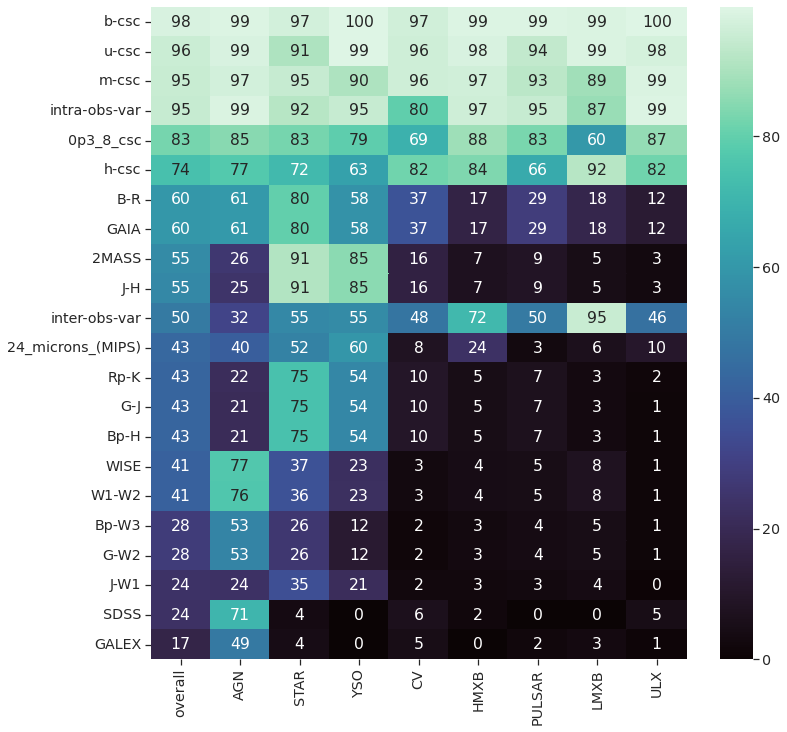

In [190]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
sns.heatmap(miss_comb_df*100 , ax=ax , annot=True , fmt='.0f' , cmap='mako')
plt.xticks(rotation=90)
plt.savefig('final_plots/missing_features.eps' , format='eps')
plt.show()

In [43]:
print(miss.to_latex(float_format="%.2f" , longtable=False))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   CV &  STAR &  HMXB &  YSO &  ULX &  AGN &  LMXB &  PULSAR \\
\midrule
gal\_b2            & 0.00 &  0.00 &  0.00 & 0.00 & 0.00 & 0.00 &  0.00 &    0.00 \\
gal\_l2            & 0.00 &  0.00 &  0.00 & 0.00 & 0.00 & 0.00 &  0.00 &    0.00 \\
var\_inter\_prob\_b  & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
var\_inter\_sigma\_b & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
var\_intra\_prob\_b  & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
var\_inter\_index\_b & 0.52 &  0.45 &  0.28 & 0.45 & 0.54 & 0.68 &  0.05 &    0.50 \\
kp\_intra\_prob\_b   & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
var\_intra\_index\_b & 0.20 &  0.08 &  0.03 & 0.05 & 0.01 & 0.01 &  0.13 &    0.05 \\
h-csc             & 0.18 &  0.28 &  0.16 & 0.37 & 0.18 & 0.23 &  0.08 &    0.34 \\
b-csc             & 0.03 &  0.03 &  0.01 & 0.00 & 0.00 & 0.01 &  0.01 &    0.01 \\
m-csc             & 0.04 &  0.05 &  0

In [24]:
miss = []
for cl in y.unique():
    temp = x_all[x_all['class']==cl].drop(columns=['class'])
    x_all.isna().sum(axis=0) / len(x_all).to_df()

gal_b2               0.000000
gal_l2               0.000000
var_inter_prob_b     0.503440
var_inter_sigma_b    0.503440
var_intra_prob_b     0.051149
var_inter_index_b    0.503440
kp_intra_prob_b      0.051149
var_intra_index_b    0.051149
h-csc                0.257432
b-csc                0.015189
m-csc                0.048293
s-csc                0.037128
u-csc                0.043100
0p3_8_csc            0.170583
FUV                  0.829287
NUV                  0.826951
u-sdss               0.765027
g-sdss               0.755420
r-sdss               0.763469
i-sdss               0.763209
z-sdss               0.764637
W1                   0.589121
W2                   0.588732
W3                   0.588212
W4                   0.584707
24_microns_(MIPS)    0.566792
J                    0.451383
H                    0.451512
K                    0.436583
G                    0.400234
Bp                   0.400234
Rp                   0.400234
B-R                  0.400234
G-J       

# Hyper Parameter Tuning

In [3]:
import pandas as pd 
import numpy as np 
from utilities import deets 
from choices import param_dict
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc'
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 73
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


In [4]:
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm
def calc_weight(gamma , y):
    l = len(y)
    cl_weight = {}
    cl_dict = y.value_counts().to_dict()
    for cl , val in zip(cl_dict.keys() , cl_dict.values()):
        w = np.exp((l / val)*gamma)
        cl_weight[cl] = w
    #print(cl_weight)
    return cl_weight


In [5]:
from optuna.integration import LightGBMPruningCallback

def objective(trial, X, y):
    print('>>>TIRAL')
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [40, 50,70,80, 100]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        # "bagging_fraction": trial.suggest_float(
        #     "bagging_fraction", 0.2, 0.95, step=0.1
        # ),
        # "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        # "feature_fraction": trial.suggest_float(
        #     "feature_fraction", 0.2, 0.95, step=0.1
        # ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        cl_weight = calc_weight(0.07 , y)
        model = lgbm.LGBMClassifier(class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,**param_grid)
        print('-----MODEL-------')
        print(model)
        print('------------------')
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="softmax",
            early_stopping_rounds=100,
            verbose=0
        )
        preds = model.predict_proba(X_test)
        #print(preds)
        #cv_scores[idx] = preds
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

In [6]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, x, y)
study.optimize(func, n_trials=20)

[I 2022-05-08 02:15:42,602] A new study created in memory with name: LGBM Classifier
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.08435810003393353,
               max_depth=10, metric=['auc_mu'], n_estimators=50, num_class=8,
               num_leaves=1920, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:16:45,236] Trial 0 finished with value: 0.2728934983808601 and parameters: {'n_estimators': 50, 'learning_rate': 0.08435810003393353, 'num_leaves': 1920, 'max_depth': 10}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.26484875700267746,
               max_depth=7, metric=['auc_mu'], n_estimators=40, num_class=8,
               num_leaves=1720, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:17:05,455] Trial 1 finished with value: 0.3092579568142292 and parameters: {'n_estimators': 40, 'learning_rate': 0.26484875700267746, 'num_leaves': 1720, 'max_depth': 7}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.20546346076682379,
               max_depth=5, metric=['auc_mu'], n_estimators=70, num_class=8,
               num_leaves=20, objective='multiclass', sparse=True, verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with pos

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2022-05-08 02:17:21,613] Trial 2 finished with value: 0.293319289647648 and parameters: {'n_estimators': 70, 'learning_rate': 0.20546346076682379, 'num_leaves': 20, 'max_depth': 5}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.21634960669965786,
               max_depth=12, metric=['auc_mu'], n_estimators=70, num_class=8,
               num_leaves=2220, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:18:35,506] Trial 3 finished with value: 0.29904015423442054 and parameters: {'n_estimators': 70, 'learning_rate': 0.21634960669965786, 'num_leaves': 2220, 'max_depth': 12}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.11330550801373894,
               max_depth=11, metric=['auc_mu'], num_class=8, num_leaves=1320,
               objective='multiclass', sparse=True, verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:20:13,132] Trial 4 finished with value: 0.28075068534637293 and parameters: {'n_estimators': 100, 'learning_rate': 0.11330550801373894, 'num_leaves': 1320, 'max_depth': 11}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.2131973970924132,
               max_depth=11, metric=['auc_mu'], n_estimators=40, num_class=8,
               num_leaves=2120, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:21:04,121] Trial 5 finished with value: 0.2943276167966497 and parameters: {'n_estimators': 40, 'learning_rate': 0.2131973970924132, 'num_leaves': 2120, 'max_depth': 11}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.06174622827511079,
               max_depth=5, metric=['auc_mu'], n_estimators=70, num_class=8,
               num_leaves=20, objective='multiclass', sparse=True, verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2022-05-08 02:21:20,565] Trial 6 finished with value: 0.3260749114802751 and parameters: {'n_estimators': 70, 'learning_rate': 0.06174622827511079, 'num_leaves': 20, 'max_depth': 5}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.1210181143093592, max_depth=4,
               metric=['auc_mu'], n_estimators=40, num_class=8, num_leaves=1520,
               objective='multiclass', sparse=True, verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:21:28,809] Trial 7 finished with value: 0.3636306456621209 and parameters: {'n_estimators': 40, 'learning_rate': 0.1210181143093592, 'num_leaves': 1520, 'max_depth': 4}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.2202807391538881,
               max_depth=10, metric=['auc_mu'], num_class=8, num_leaves=2920,
               objective='multiclass', sparse=True, verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:22:24,418] Trial 8 finished with value: 0.2927184705801945 and parameters: {'n_estimators': 100, 'learning_rate': 0.2202807391538881, 'num_leaves': 2920, 'max_depth': 10}. Best is trial 0 with value: 0.2728934983808601.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 

/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:23:27,416] Trial 9 finished with value: 0.2876330784890157 and parameters: {'n_estimators': 100, 'learning_rate': 0.18328780050940865, 'num_leaves': 2720, 'max_depth': 10}. Best is trial 0 with value: 0.2728934983808601.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.01658329475009357,
               max_depth=8, metric=['auc_mu'], n_estimators=50, num_class=8,
               num_leaves=920, objective='multiclass', sparse=True,
               verbosity=0)
------------------


/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:23:59,099] Trial 10 finished with value: 0.7657269269345264 and parameters: {'n_estimators': 50, 'learning_rate': 0.01658329475009357, 'num_leaves': 920, 'max_depth': 8}. Best is trial 0 with value: 0.2728934983808601.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.11186452530943586,
               max_depth=9, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=920, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:24:57,618] Trial 11 finished with value: 0.27246131174898347 and parameters: {'n_estimators': 80, 'learning_rate': 0.11186452530943586, 'num_leaves': 920, 'max_depth': 9}. Best is trial 11 with value: 0.27246131174898347.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
>>>TIRAL


/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.08359967779049024,
               max_depth=8, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=720, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:25:47,929] Trial 12 finished with value: 0.2694070289408567 and parameters: {'n_estimators': 80, 'learning_rate': 0.08359967779049024, 'num_leaves': 720, 'max_depth': 8}. Best is trial 12 with value: 0.2694070289408567.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.14569265658477104,
               max_depth=8, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=720, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:26:35,030] Trial 13 finished with value: 0.28261503292965884 and parameters: {'n_estimators': 80, 'learning_rate': 0.14569265658477104, 'num_leaves': 720, 'max_depth': 8}. Best is trial 12 with value: 0.2694070289408567.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.04700023273350605,
               max_depth=7, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=620, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:27:16,273] Trial 14 finished with value: 0.29045792142972543 and parameters: {'n_estimators': 80, 'learning_rate': 0.04700023273350605, 'num_leaves': 620, 'max_depth': 7}. Best is trial 12 with value: 0.2694070289408567.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.1084246158977403, max_depth=9,
               metric=['auc_mu'], n_estimators=80, num_class=8, num_leaves=1020,
               objective='multiclass', sparse=True, verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:28:13,028] Trial 15 finished with value: 0.2702334808875583 and parameters: {'n_estimators': 80, 'learning_rate': 0.1084246158977403, 'num_leaves': 1020, 'max_depth': 9}. Best is trial 12 with value: 0.2694070289408567.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.16222750075941103,
               max_depth=6, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=420, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:28:41,119] Trial 16 finished with value: 0.2827617250268227 and parameters: {'n_estimators': 80, 'learning_rate': 0.16222750075941103, 'num_leaves': 420, 'max_depth': 6}. Best is trial 12 with value: 0.2694070289408567.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.07625204269649177,
               max_depth=9, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=1220, objective='multiclass', sparse=True,
               verbosity=0)
------------------


/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:29:39,795] Trial 17 finished with value: 0.2731796622747429 and parameters: {'n_estimators': 80, 'learning_rate': 0.07625204269649177, 'num_leaves': 1220, 'max_depth': 9}. Best is trial 12 with value: 0.2694070289408567.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.01944006859684841,
               max_depth=3, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=420, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2022-05-08 02:29:50,641] Trial 18 finished with value: 0.7874251935333871 and parameters: {'n_estimators': 80, 'learning_rate': 0.01944006859684841, 'num_leaves': 420, 'max_depth': 3}. Best is trial 12 with value: 0.2694070289408567.
/home/kumaran/.local/lib/python3.6/site-packages/optuna/distributions.py:563: UserWarning:

The distribution is specified by [20, 3000] and step=100, but the range is not divisible by `step`. It will be replaced by [20, 2920].

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



>>>TIRAL
-----MODEL-------
LGBMClassifier(class_weight={'AGN': 1.2524978967563674,
                             'CV': 25.745323836808723,
                             'HMXB': 2.0562192560551287,
                             'LMXB': 43.41041115489145,
                             'PULSAR': 208.24450024014098,
                             'STAR': 1.2132045326966958,
                             'ULX': 12.87770640060345,
                             'YSO': 1.5988527422270495},
               is_unbalance=True, learning_rate=0.29074000898894325,
               max_depth=6, metric=['auc_mu'], n_estimators=80, num_class=8,
               num_leaves=1120, objective='multiclass', sparse=True,
               verbosity=0)
------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/home/kumaran/.local/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2022-05-08 02:30:17,392] Trial 19 finished with value: 0.33811212432328774 and parameters: {'n_estimators': 80, 'learning_rate': 0.29074000898894325, 'num_leaves': 1120, 'max_depth': 6}. Best is trial 12 with value: 0.2694070289408567.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [7]:

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 0.26941
	Best params:
		n_estimators: 80
		learning_rate: 0.08359967779049024
		num_leaves: 720
		max_depth: 8


# Hyper Parameter tuning : Marginal

In [40]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
import lightgbm as lgb 
%load_ext autoreload
%autoreload 2

def calc_weight(gamma , y):
    l = len(y)
    cl_weight = {}
    cl_dict = y.value_counts().to_dict()
    for cl , val in zip(cl_dict.keys() , cl_dict.values()):
        w = np.exp((l / val)*gamma)
        cl_weight[cl] = w
    #print(cl_weight)
    return cl_weight

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd 
import numpy as np 
from utilities import deets 
from choices import param_dict
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc'
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 73
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


In [11]:
class make_model():
    def __init__(self , name , clf , gamma ,x ,y):
        self.name = name 
        self.clf = clf 
        self.gamma = gamma 
        self.x = x 
        self.y = y 
        
    def validate(self , fname= '' , k=10 , normalize_prob=0 , score_average = 'macro'):
        from utilities import simple_cv
        #self.weight = self.calc_weight(self.gamma ,self.y)
        res = simple_cv(self.x,self.y , model=self.clf , k=k , normalize_prob=normalize_prob , score_average = score_average)
        res['gamma'] = self.gamma 
        #res['class_weight'] = calc_weight(slef)
        print(res['class_scores'].to_markdown())
        self.result = res
        if(fname):
            import joblib
            joblib.dump(res , fname)
        return self
    
    def train(self):
        clf = self.clf
        clf.fit(self.x , self.y)
        return self
    def save(self , fname):
        import joblib
        joblib.dump(self , fname)

In [13]:
import lightgbm as lgb 
import joblib

### n_estimators

In [24]:
try:
    n_est_tune = joblib.load('../not_on_git/n_est_tune_dict.pkl')
except:
    n_est_tune = {}

In [ ]:
    
for n in [800 , 1000]:
    gamma = 0.07
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators=n ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , random_state=42 , num_class=len(np.unique(y)) ,force_col_wise=True)
    model = make_model('lightGBM' , clf ,gamma , x,y)
    model.validate()
    n_est_tune[n] = {
        'avg_scores' : model.result['avg_scores'] ,
        'class_scores' : model.result['class_scores']
    }
    joblib.dump(n_est_tune , '../not_on_git/n_est_tune_dict.pkl' , compress=3)


In [33]:
n_est_tune[1000]

{'avg_scores': {'balanced_accuracy': 0.7834214647032423,
  'accuracy': 0.9341814877320525,
  'precision': 0.820823260161457,
  'recall': 0.7834214647032423,
  'f1': 0.800531040446295},
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.978706         0.965801  0.972211
 CV          0.548193         0.619048  0.581470
 HMXB        0.917112         0.911023  0.914057
 LMXB        0.811189         0.943089  0.872180
 PULSAR      0.425743         0.505882  0.462366
 STAR        0.957348         0.960446  0.958894
 ULX         0.668246         0.738220  0.701493
 YSO         0.960836         0.923077  0.941578}

In [38]:
n_est_tune.keys()

dict_keys([50, 100, 200, 300, 400, 500, 600, 800])

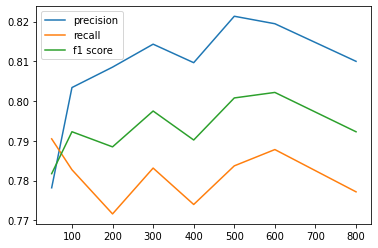

In [39]:
a , p ,r ,f ,m = [], [] , [], [] , []
for n in n_est_tune.values():
    a.append(n['avg_scores']['accuracy'])
    p.append(n['avg_scores']['precision'])
    r.append(n['avg_scores']['recall'])
    f.append(n['avg_scores']['f1'])
    #m.append(n['mcc'])
plt.plot(n_est_tune.keys() , p , label='precision')
plt.plot(n_est_tune.keys() , r , label='recall')
plt.plot(n_est_tune.keys() , f , label='f1 score')
#plt.plot(n_est_tune.keys() , m , label='MCC')
#plt.plot(n_est_tune.keys() , a , label='')
plt.legend()
plt.show()

### Learning Rate

In [41]:
try:
    lr_tune = joblib.load('../not_on_git/lr_tune_dict.pkl')
except:
    lr_tune = {}

In [ ]:
    
for n in [0.01 , 0.05 , 0.1 , 0.15 , 0.20 , 0.25 , 0.30]:
    gamma = 0.07
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators=80 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , random_state=42 , num_class=len(np.unique(y)) ,force_col_wise=True , learning_rate = n)
    model = make_model('lightGBM' , clf ,gamma , x,y)
    model.validate(k=5)
    lr_tune[n] = {
        'avg_scores' : model.result['avg_scores'] ,
        'class_scores' : model.result['class_scores']
    }
    joblib.dump(n_est_tune , '../not_on_git/lr_tune_dict.pkl' , compress=3)


In [52]:
lr_tune[0.25]

{'avg_scores': {'balanced_accuracy': 0.7689957001688149,
  'accuracy': 0.9289887056990783,
  'precision': 0.8059085027346792,
  'recall': 0.7689957001688149,
  'f1': 0.7857888964081075},
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.976200         0.962536  0.969320
 CV          0.560241         0.632653  0.594249
 HMXB        0.897059         0.906757  0.901882
 LMXB        0.776224         0.940678  0.850575
 PULSAR      0.366337         0.425287  0.393617
 STAR        0.955914         0.956943  0.956428
 ULX         0.663507         0.703518  0.682927
 YSO         0.956484         0.918896  0.937313}

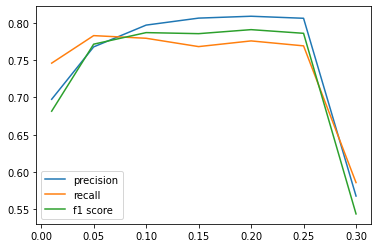

In [51]:
a , p ,r ,f ,m = [], [] , [], [] , []
for n in lr_tune.values():
    a.append(n['avg_scores']['accuracy'])
    p.append(n['avg_scores']['precision'])
    r.append(n['avg_scores']['recall'])
    f.append(n['avg_scores']['f1'])
    #m.append(n['avg_scores']['mcc'])
plt.plot(lr_tune.keys() , p , label='precision')
plt.plot(lr_tune.keys() , r , label='recall')
plt.plot(lr_tune.keys() , f , label='f1 score')
#plt.plot(lr_tune.keys() , m , label='MCC')
#plt.plot(lr_tune.keys() , a , label='')
plt.legend()
plt.show()

# Source Variability

In [53]:
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
x_col = x.columns.to_list()
i = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df = pd.merge(i,x , left_index =True , right_index =True )
df = df[df['offset']<1.01]
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc'
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )


classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
df = df[df['class'].isin(classes)]
#from sklearn.preprocessing import LabelEncoder
#y_int = LabelEncoder().fit_transform(df['class'])
deets(df,1)
u = pd.read_csv('compiled_data_v3/x_phot_minmax-unid-var-src.csv' , index_col='name')
u = u.drop(columns=feat_to_drop)
u.columns = u.columns.str.replace(' ' ,'_' , regex=False)
x = df[x_col]
x = x.drop(columns=feat_to_drop)
x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
y = df['class']
deets(x)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 73
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


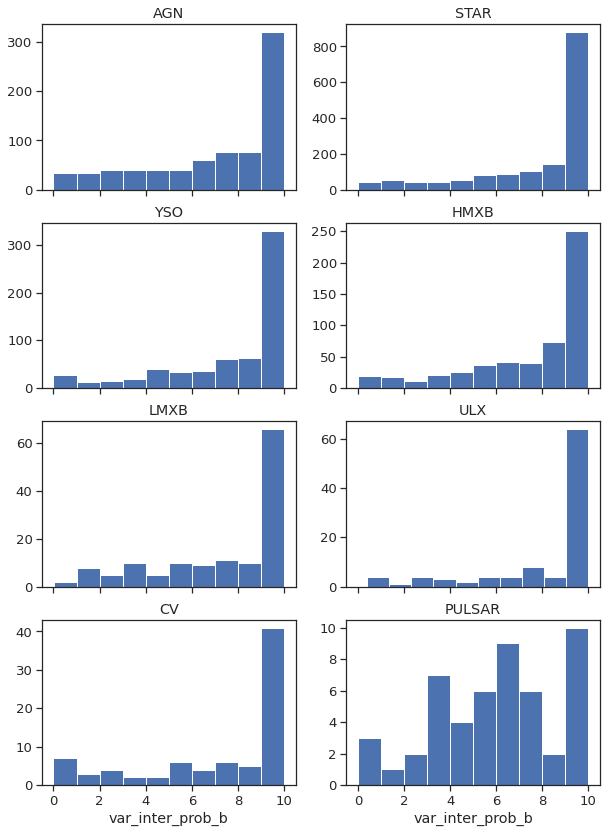

In [86]:
cl = ['AGN' ,'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'ULX' ,'CV' ,'PULSAR']
sns.set(font_scale=1.2, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':False} , style="ticks")
f = 'kp_intra_prob_b'
f = 'var_inter_prob_b'
fig , ax = plt.subplots(nrows=4, ncols=2 , figsize=(10,14) , sharex=True)
#plt.hist(x['kp_intra_prob_b'])
cl = np.reshape(cl , ax.shape)
for i in range(4):
    for j in range(2):
        temp = x[y==cl[i][j]]
        ax[i][j].hist(temp[f] , label = cl[i][j])
        ax[i][j].set_title(cl[i][j])
        #ax[i][j].legend()
        #ax[i][j].set_xlabel('var_intra_prob_b')
ax[3][0].set_xlabel(f)
ax[3][1].set_xlabel(f)

plt.show()

# Application on Globular Cluster sources

### Find globular cluster source names

### Imports

In [9]:
# Basic numeric and plotting imports

import numpy as np
import scipy

from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
import matplotlib.colors as colors


import astropy
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astroquery.vizier import Vizier

import pyvo as vo

from ciao_contrib.runtool import search_csc
from sherpa.astro import ui

In [11]:
import joblib
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np 
from utilities import make_model
import pandas as pd 

### Cone Search GC

In [12]:
gc = pd.read_csv('temp_files/gc_cat.csv')[['ID' , 'RA(2000)' , 'DEC']]
gc 

ID       RA(2000)           DEC
0       NGC-104  00 24 05.67     -72 04 52.6
1       NGC-288   00 52 45.24    -26 34 57.4
2       NGC-362    01 03 14.26  -70 50 55.6 
3     Whiting_1       02 02 57     -03 15 10
4       NG_1261    03 12 16.21   -55 12 58.4
..          ...            ...           ...
152    NGC-7089    21 33 27.02   -00 49 23.7
153    NGC-7099    21 40 22.12   -23 10 47.5
154      Pal-12    21 46 38.84   -21 15 09.4
155      Pal-13    23 06 44.44   +12 46 19.2
156    NGC-7492    23 08 26.63   -15 36 41.4

[157 rows x 3 columns]

In [13]:
cone = vo.dal.SCSService('http://cda.cfa.harvard.edu/csc2scs/coneSearch')

In [14]:
help(cone.search)

Help on method search in module pyvo.dal.scs:

search(pos, radius=1.0, verbosity=2, **keywords) method of pyvo.dal.scs.SCSService instance
    submit a simple Cone Search query that requests objects or observations
    whose positions fall within some distance from a search position.
    
    Parameters
    ----------
    pos : astropy.coordinates.SkyCoord
        a SkyCoord instance defining the position of the center of the
        circular search region.
        converted if it's a iterable containing scalars,
        assuming icrs degrees.
    radius : `~astropy.units.Quantity` or float
        a Quantity instance defining the radius of the circular search
        region, in degrees.
        converted if it is another unit.
    verbosity : int
       an integer value that indicates the volume of columns
       to return in the result table.  0 means the minimum
       set of columns, 3 means as many columns as are available.
    **keywords :
       additional case insensitive param

In [16]:
gc[['RA(2000)' , 'DEC']]

RA(2000)           DEC
0    00 24 05.67     -72 04 52.6
1     00 52 45.24    -26 34 57.4
2      01 03 14.26  -70 50 55.6 
3         02 02 57     -03 15 10
4      03 12 16.21   -55 12 58.4
..             ...           ...
152    21 33 27.02   -00 49 23.7
153    21 40 22.12   -23 10 47.5
154    21 46 38.84   -21 15 09.4
155    23 06 44.44   +12 46 19.2
156    23 08 26.63   -15 36 41.4

[157 rows x 2 columns]

In [24]:
from astropy.coordinates import ICRS, Galactic, FK4, FK5
coords = ["1:12:43.2 +31:12:43", "1 12 43.2 +31 12 43"]
coords = [f'{r} {d}' for r,d in zip(gc['RA(2000)'] ,  gc['DEC'])]
coords = SkyCoord(coords, frame=FK4, unit=(u.hourangle, u.deg),)

In [23]:
maxrad = 30*u.arcmin
gc_obj = {}
#for n , c in zip(gc['ID'] , coords):
results = cone.search(pos=c[1], radius=maxrad, verbosity=3)
results

<Table length=17>
         name                  ra         ... hrc_hetg_time hrc_letg_time
                              deg         ...       s             s      
        object              float64       ...    float64       float64   
---------------------- ------------------ ... ------------- -------------
 2CXO J005628.2-261634 14.117815092997546 ...            --            --
 2CXO J005646.4-261050 14.193429130543166 ...            --            --
 2CXO J005651.0-260913 14.212556971234108 ...            --            --
 2CXO J005705.3-261706 14.272188584129879 ...            --            --
 2CXO J005705.7-261821 14.273788516353761 ...            --            --
 2CXO J005706.5-261513 14.277317638550812 ...            --            --
 2CXO J005708.0-261350  14.28341744765811 ...            --            --
 2CXO J005710.4-261521 14.293494239540053 ...            --            --
 2CXO J005710.7-262201 14.294972613312211 ...            --            --
 2CXO J005711.6-2621

In [33]:
maxrad = 30*u.arcmin
i = 0
results = cone.search(pos=c[i], radius=maxrad, verbosity=3)
temp = results.to_table().to_pandas()[['name' ,'ra' ,'dec' , 'err_ellipse_r0' , 'err_ellipse_r1' , 'err_ellipse_ang' , 'gal_b' , 'gal_l']]
temp = temp.drop_duplicates('name')
temp.insert(0 , 'gc' , gc['ID'][i])
temp 

### Application

In [89]:
model = joblib.load('models/lightGBM-final.pkl')
model

In [92]:
clf = model.clf

In [93]:
u = []
ui = []
for i in range(8):
    u.append(pd.read_csv(f'compiled_data_v3/unid-non-var-chunks/x-chunk-{i}.csv' , index_col='name'))
    ui.append(pd.read_csv(f'compiled_data_v3/unid-non-var-chunks/id-chunk-{i}.csv' , index_col='name'))
u = pd.concat(u)
ui = pd.concat(ui)
u

gal_b2    gal_l2  hard_hs  hard_hm  hard_ms  \
name                                                                   
2CXO J003935.9-732725  2.561951  8.447115  4.70625  6.15625  3.46250   
2CXO J003936.7-731249  2.548397  8.447672  4.91875  6.71875  3.15625   
2CXO J004028.7-731106  2.546591  8.445331  6.68125  6.35000  5.32500   
2CXO J004506.3-730056  2.536271  8.432664  4.66875  4.46875  5.21250   
2CXO J004659.0-731918  2.553126  8.427077  6.97500  5.75625  6.09375   
...                         ...       ...      ...      ...      ...   
2CXO J220556.3-500415  2.145628  9.595540  6.95625  7.61875  4.04375   
2CXO J220557.3-500827  2.146864  9.592593  2.91250  7.80625  1.17500   
2CXO J220600.9-501131  2.147357  9.590334  2.44375  4.18125  3.11875   
2CXO J220601.0-501116  2.147275  9.590501  4.33750  4.97500  4.41250   
2CXO J220604.6-500739  2.145581  9.592850  4.29375  5.65625  3.71250   

                       var_inter_prob_b  var_inter_sigma_b  var_intra_prob_b  \
name                                                                           
2CXO J003935.9-732725               NaN                NaN          2.809762   
2CXO J003936.7-731249               NaN                NaN          5.267622   
2CXO J004028.7-731106               NaN                NaN          2.001693   
2CXO J004506.3-730056               NaN                NaN          1.712439   
2CXO J004659.0-731918               NaN                NaN          2.771679   
...                                 ...                ...               ...   
2CXO J220556.3-500415               NaN                NaN          4.616799   
2CXO J220557.3-500827               NaN                NaN          7.608600   
2CXO J220600.9-501131          6.145112           0.001324          4.804390   
2CXO J220601.0-501116          2.585487           0.000217          4.815425   
2CXO J220604.6-500739          8.317714           0.000084          4.792465   

                       var_inter_index_b  kp_intra_prob_b  ...        Rp  \
name                                                       ...             
2CXO J003935.9-732725                NaN         8.723285  ...       NaN   
2CXO J003936.7-731249                NaN         3.246585  ...  8.751645   
2CXO J004028.7-731106                NaN         2.474462  ...       NaN   
2CXO J004506.3-730056                NaN         8.102221  ...       NaN   
2CXO J004659.0-731918                NaN         3.443930  ...       NaN   
...                                  ...              ...  ...       ...   
2CXO J220556.3-500415                NaN         0.528451  ...       NaN   
2CXO J220557.3-500827                NaN         7.668830  ...       NaN   
2CXO J220600.9-501131               5.00         8.861115  ...  8.616583   
2CXO J220601.0-501116               0.00         2.256353  ...       NaN   
2CXO J220604.6-500739               6.25         6.974410  ...       NaN   

                            B-R  G-J  G-W2  Bp-H  Bp-W3  Rp-K  J-H  J-W1  \
name                                                                       
2CXO J003935.9-732725       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J003936.7-731249  2.628340  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J004028.7-731106       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J004506.3-730056       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J004659.0-731918       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
...                         ...  ...   ...   ...    ...   ...  ...   ...   
2CXO J220556.3-500415       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J220557.3-500827       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J220600.9-501131  3.240831  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J220601.0-501116       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   
2CXO J220604.6-500739       NaN  NaN   NaN   NaN    NaN   NaN  NaN   NaN   

                         W1-W2  
name                            
2CX

In [94]:
ui

significance  var_flag  streak_src_flag  pileup_flag  \
name                                                                          
2CXO J003935.9-732725      3.294118         0                0            0   
2CXO J003936.7-731249      4.157895         0                0            0   
2CXO J004028.7-731106     14.422175         0                0            0   
2CXO J004506.3-730056     10.447263         0                0            0   
2CXO J004659.0-731918      2.444444         0                0            0   
...                             ...       ...              ...          ...   
2CXO J220556.3-500415      2.631579         0                0            0   
2CXO J220557.3-500827      2.578947         0                0            0   
2CXO J220600.9-501131     10.093500         0                0            0   
2CXO J220601.0-501116      3.555556         0                0            0   
2CXO J220604.6-500739      3.000000         0                0            0   

                               ra        dec   missing  sat_src_flag  \
name                                                                   
2CXO J003935.9-732725    9.899767 -73.457136  0.576271             0   
2CXO J003936.7-731249    9.903193 -73.213742  0.525424             0   
2CXO J004028.7-731106   10.119748 -73.185171  0.508475             0   
2CXO J004506.3-730056   11.276413 -73.015666  0.593220             0   
2CXO J004659.0-731918   11.745895 -73.321890  0.593220             0   
...                           ...        ...       ...           ...   
2CXO J220556.3-500415  331.484996 -50.070913  0.542373             0   
2CXO J220557.3-500827  331.489033 -50.141066  0.508475             0   
2CXO J220600.9-501131  331.504140 -50.192019  0.389831             0   
2CXO J220601.0-501116  331.504208 -50.187958  0.457627             0   
2CXO J220604.6-500739  331.519426 -50.127558  0.355932             0   

                       extent_flag  conf_flag  
name                                           
2CXO J003935.9-732725            0          0  
2CXO J003936.7-731249            0          0  
2CXO J004028.7-731106            0          0  
2CXO J004506.3-730056            0          0  
2CXO J004659.0-731918            0          0  
...                            ...        ...  
2CXO J220556.3-500415            0          0  
2CXO J220557.3-500827            0          0  
2CXO J220600.9-501131            0          0  
2CXO J220601.0-501116            0          0  
2CXO J220604.6-500739            0          0  

[237176 rows x 10 columns]